In [1]:
import pandas as pd

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

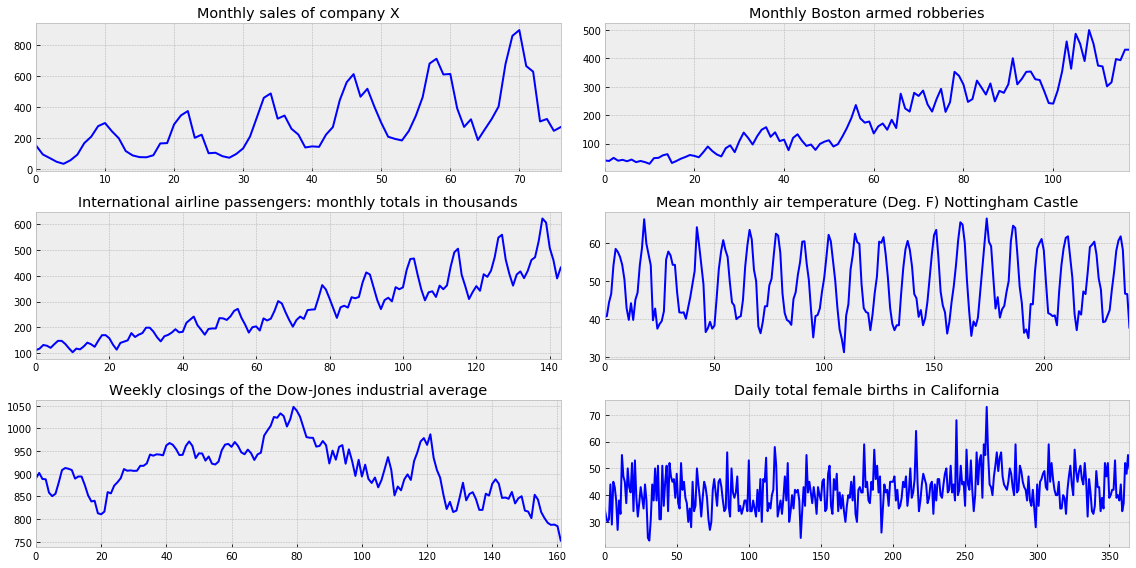

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [6]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

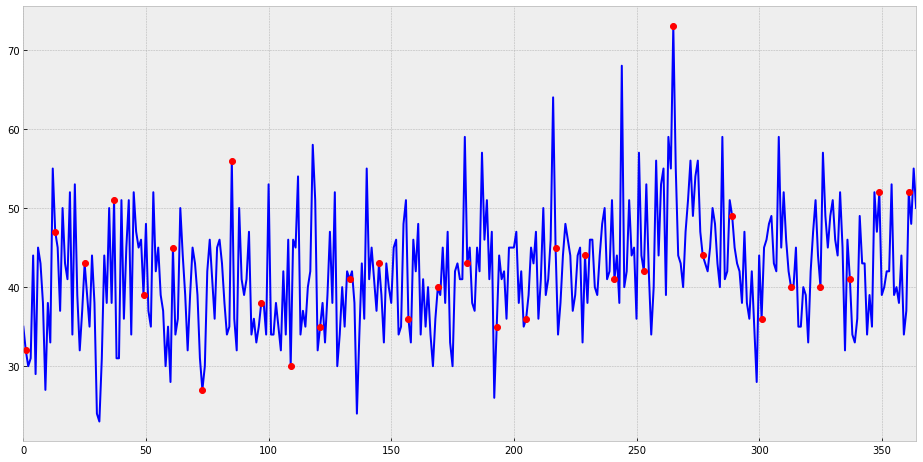

In [18]:
plot_ts_and_points(female_births["Count"], 1, 12)

# Нормализуем дисперсию

In [20]:
from scipy.stats import boxcox

In [21]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

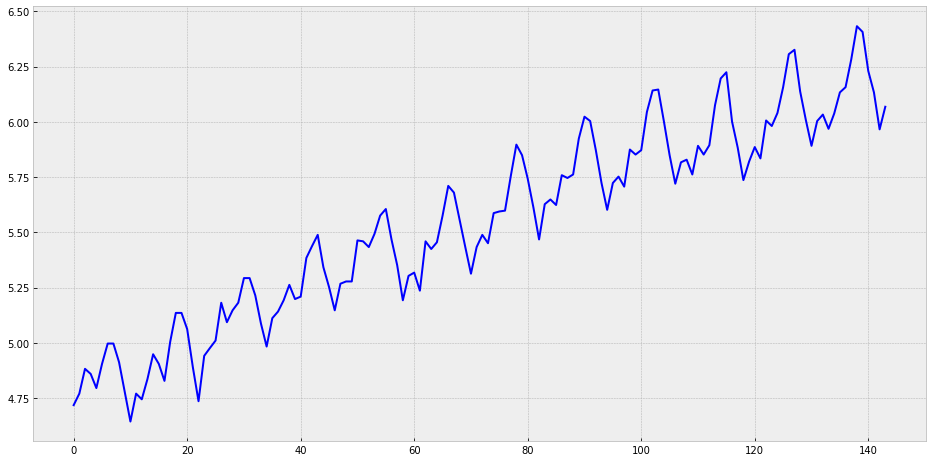

In [22]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [54]:
series1 = boxcox(all_series["Monthly sales of company X"], 0.3)

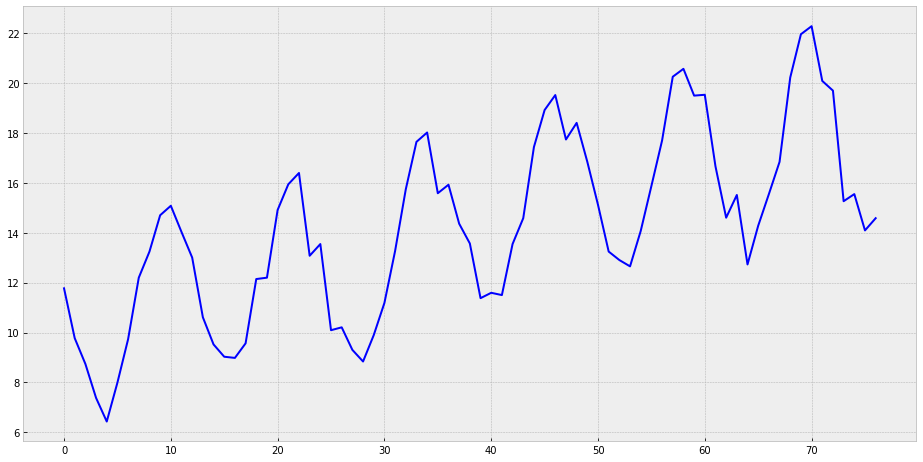

In [55]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')

In [56]:
series2 = boxcox(all_series['Monthly Boston armed robberies'], 0.3)

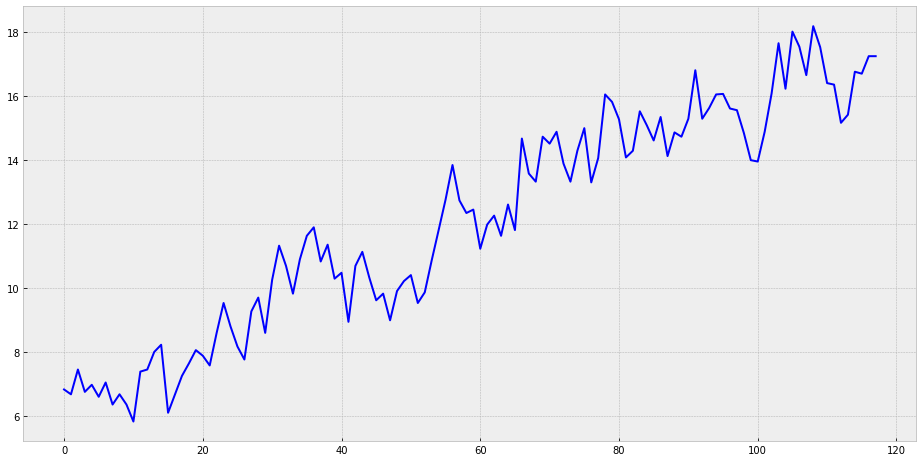

In [57]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2, color='blue')

# Дифференцируем 

In [47]:
import numpy as np

In [48]:
series = np.diff(series, 1)

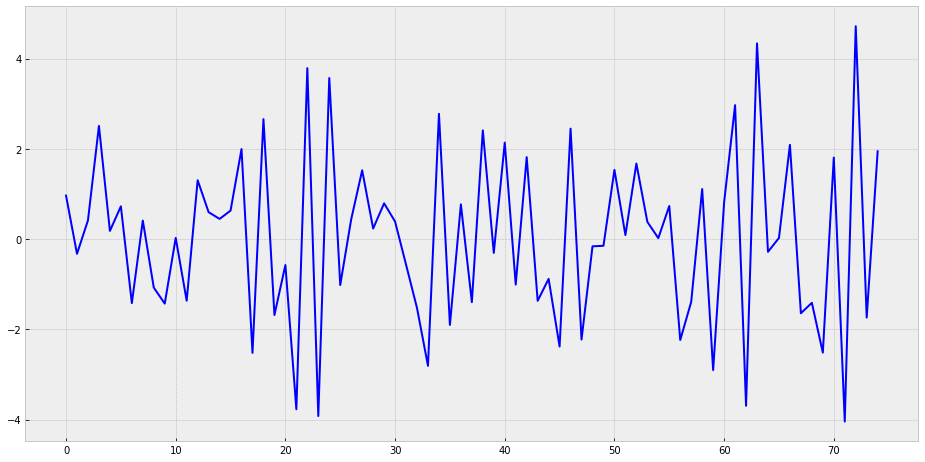

In [49]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [63]:
series1org = np.diff(all_series["Monthly sales of company X"],1)

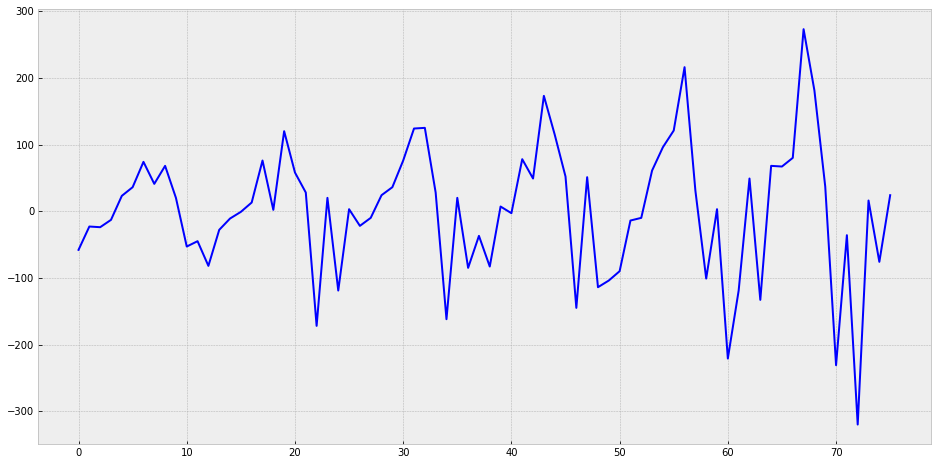

In [64]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1org, color='blue')

In [58]:
series1diff = np.diff(series1, 1)

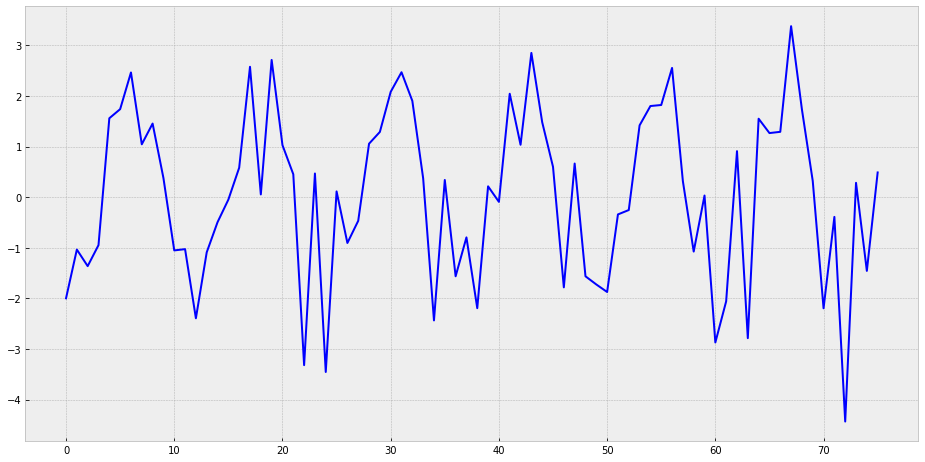

In [59]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1diff, color='blue')

In [65]:
series2org = np.diff(all_series['Monthly Boston armed robberies'],1)

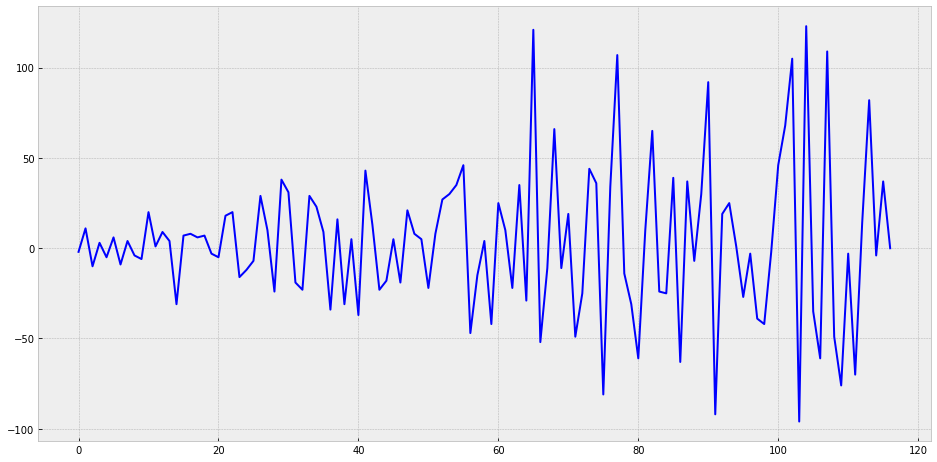

In [66]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2org, color='blue')

In [61]:
series2diff = np.diff(series2, 1)

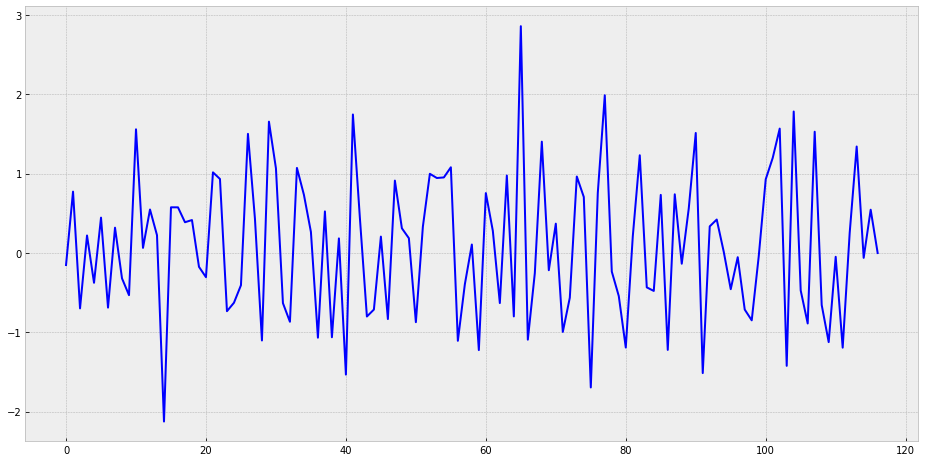

In [62]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2diff, color='blue')

In [69]:
series2org_boxcox = boxcox(series2org+150, 0.3)

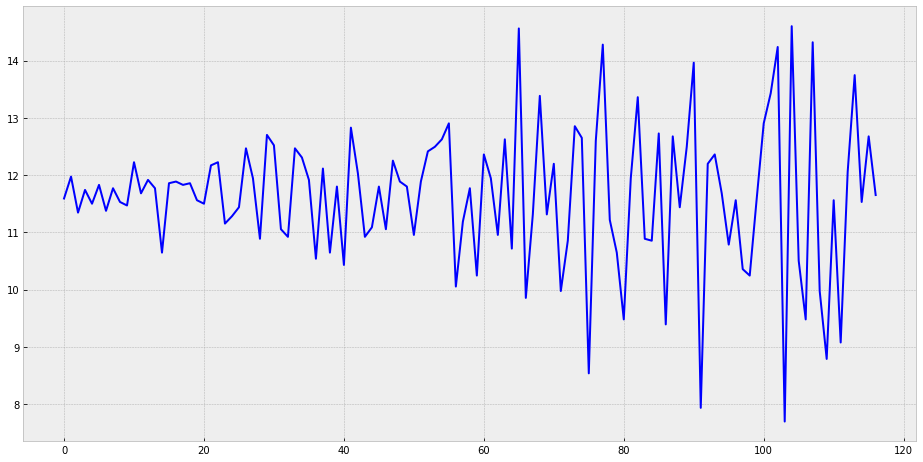

In [70]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series2org_boxcox, color='blue')

# Тест Дики-Фуллера 

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [77]:
# если p-value меньше .05 то ряд стационарен 
test_stationarity(series2)

Results of Dickey-Fuller Test:
Test Statistic                  -0.919345
p-value                          0.781535
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [78]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Коррелограммы

In [79]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [80]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


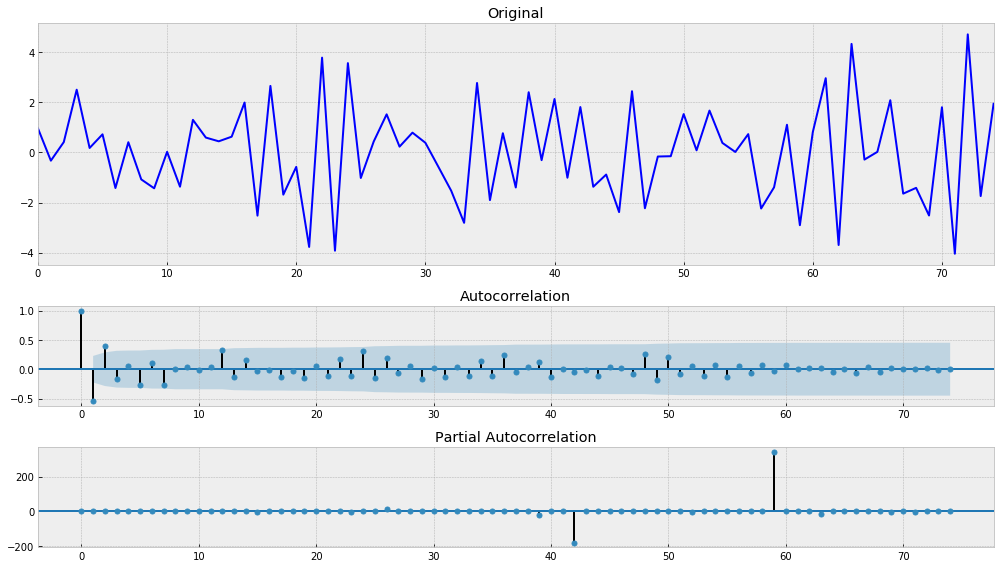

In [81]:
tsplot(series)

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


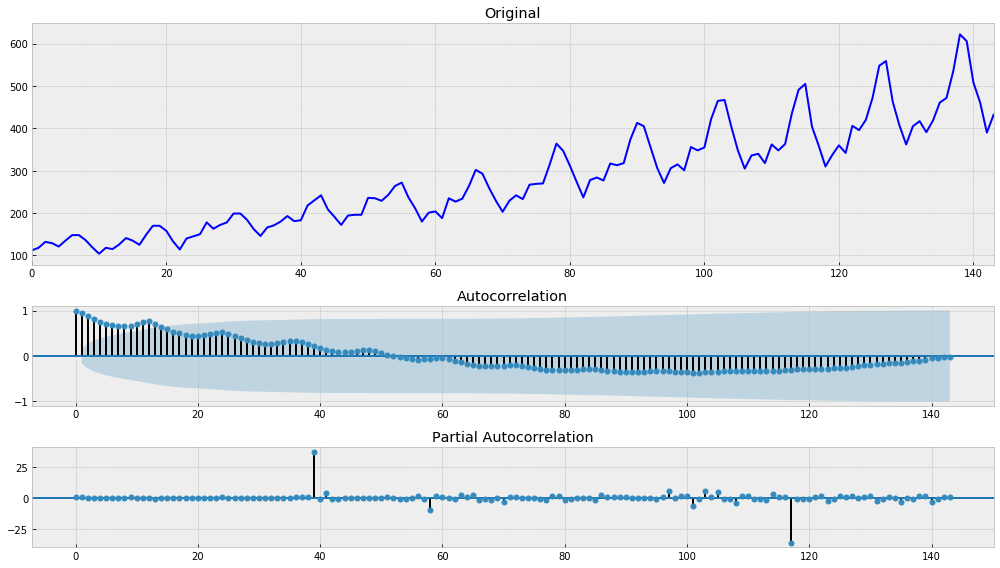

In [82]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

In [169]:
serorg = all_series["Weekly closings of the Dow-Jones industrial average"]

In [170]:
serorg_box_cox = boxcox(serorg, 0.5)

In [171]:
serorg_bx_diff = np.diff(serorg_box_cox, 2)

In [172]:
no_season_serorg_bx_diff = serorg_bx_diff[:-12] - serorg_bx_diff[12:]

In [173]:
test_stationarity(serorg)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


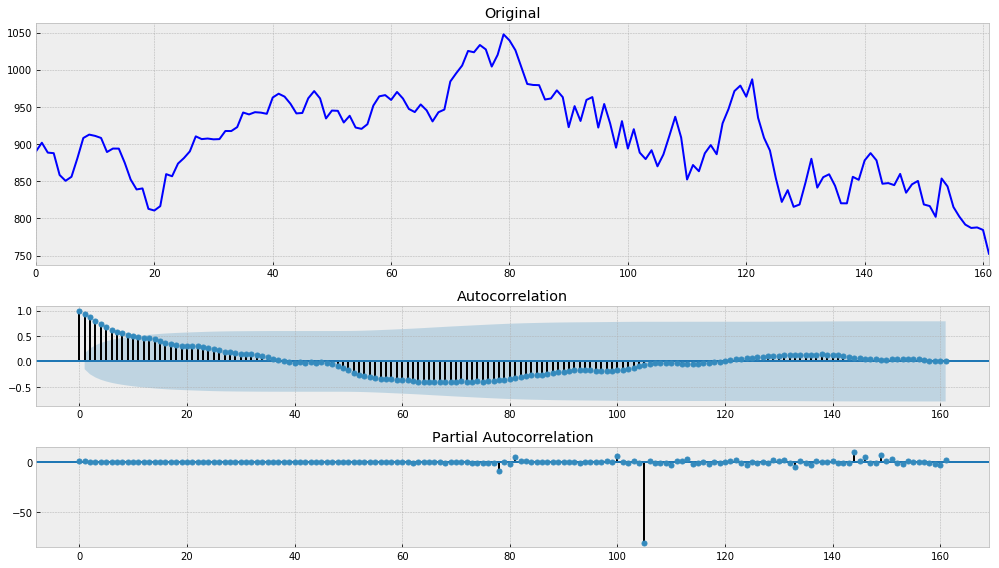

In [174]:
tsplot(serorg)

In [175]:
test_stationarity(serorg_box_cox)

Results of Dickey-Fuller Test:
Test Statistic                  -1.263690
p-value                          0.645616
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


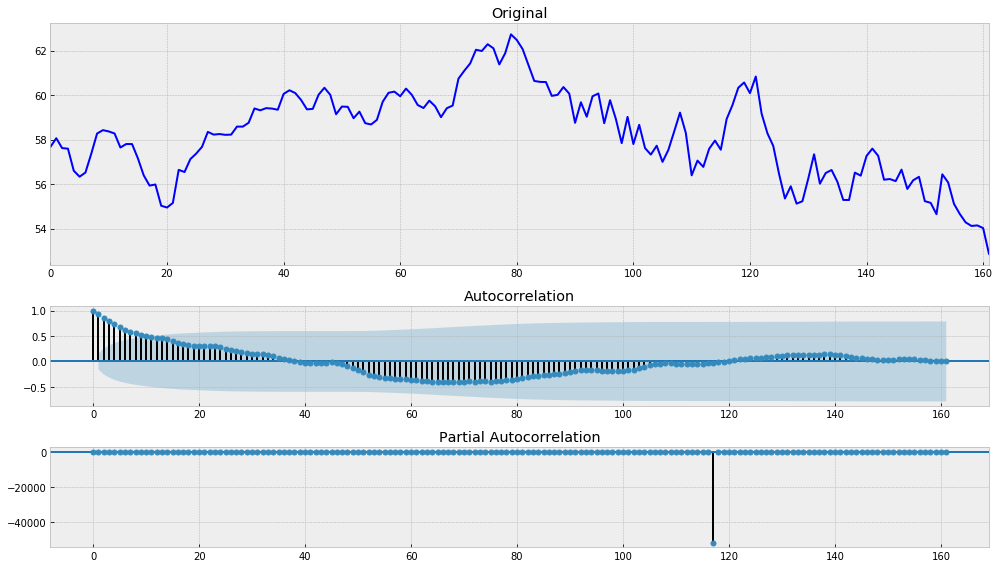

In [176]:
tsplot(serorg_box_cox)

In [177]:
test_stationarity(serorg_bx_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -5.070912
p-value                          0.000016
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


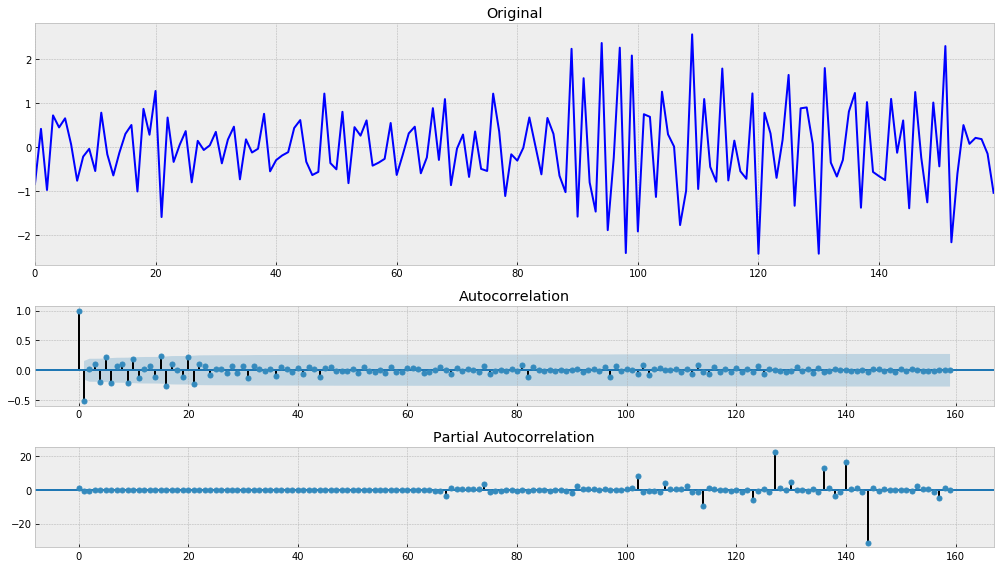

In [178]:
tsplot(serorg_bx_diff)

In [179]:
test_stationarity(no_season_serorg_bx_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.971618e+00
p-value                        8.635580e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


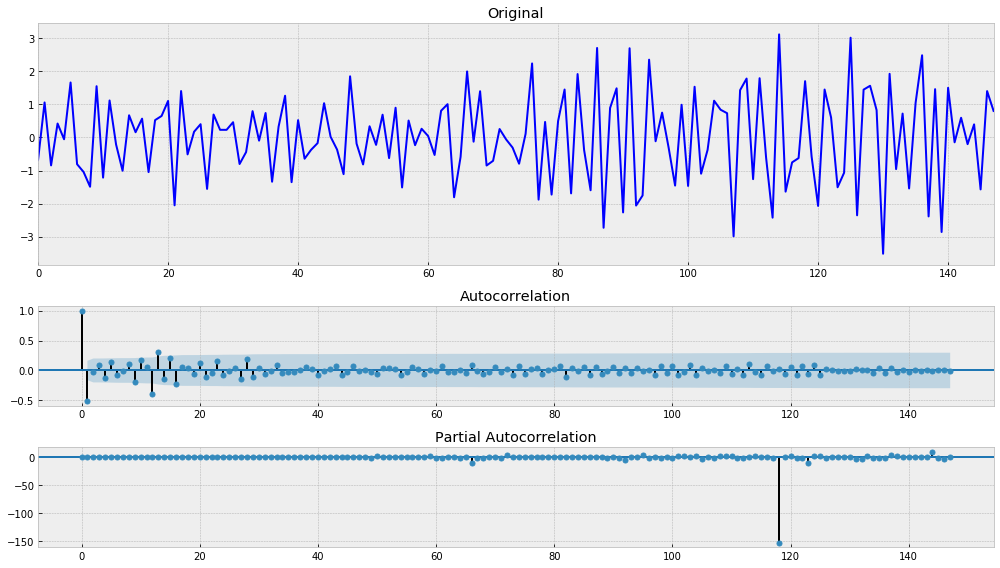

In [180]:
tsplot(no_season_serorg_bx_diff)

In [181]:
serorg_bx_diff_2 = serorg_bx_diff[1:] - serorg_bx_diff[:-1]

In [ ]:
def test_and_plot(ser):
    test_stationarity(ser)
    tsplot(ser)

Results of Dickey-Fuller Test:
Test Statistic                -7.526750e+00
p-value                        3.667615e-11
#Lags Used                     1.400000e+01
Number of Observations Used    1.440000e+02
Critical Value (1%)           -3.476598e+00
Critical Value (5%)           -2.881829e+00
Critical Value (10%)          -2.577589e+00
dtype: float64


/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


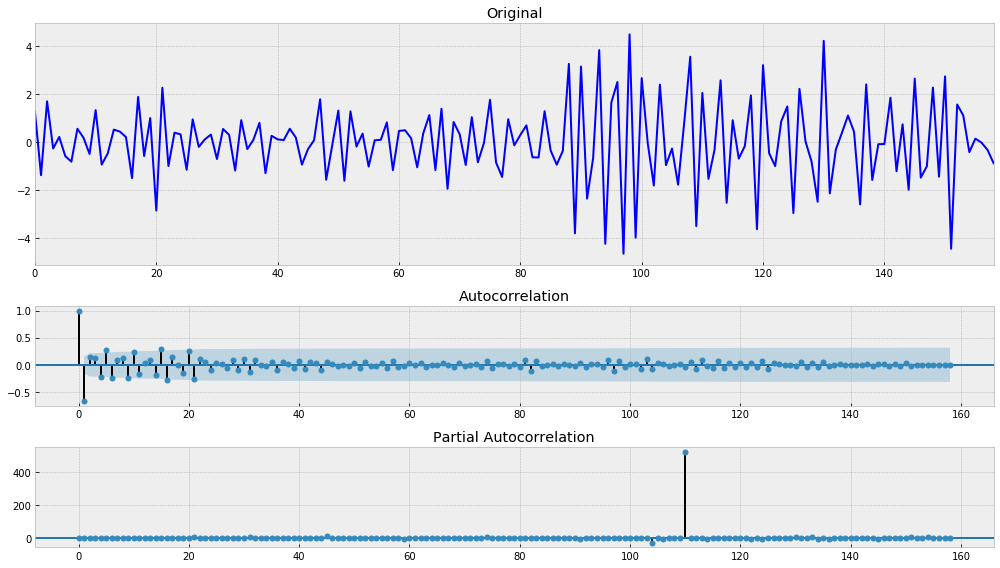

In [183]:
test_and_plot(serorg_bx_diff_2)

In [152]:
def processing(ser):
    test_and_plot(ser)
    serorg_box_cox = boxcox(ser)
    serorg_bx_diff = np.diff(serorg_box_cox, 2)
    test_and_plot(serorg_bx_diff)
    no_season_serorg_bx_diff = serorg_bx_diff[:-12] - serorg_bx_diff[12:]
    test_and_plot(no_season_serorg_bx_diff)